# Image Classification with CNN for Malaria Data

In [1]:
# Import libraries

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
base_path = r"C:\Users\merve\Documents\yapay zeka\projects\Image Classification with CNN for Malaria Data\cell_images"
parasitized_path = os.path.join(base_path, "parasitized")
uninfected_path = os.path.join(base_path, "uninfected")

In [4]:
# Parasitized görsel örneği
parasitized_images = [filename for filename in os.listdir(parasitized_path) if filename.endswith(".png")]
parasitized_image_path = os.path.join(parasitized_path, parasitized_images[0])
parasitized_image = Image.open(parasitized_image_path)

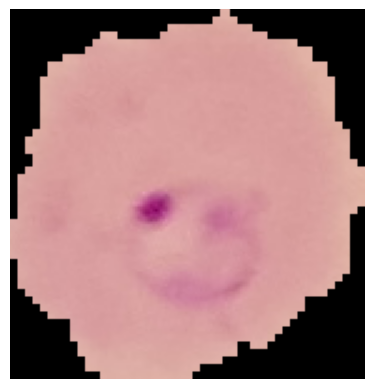

In [5]:
plt.imshow(parasitized_image)
plt.axis("off")
plt.show()

In [6]:
# Uninfected görsel örneği
uninfected_images = [filename for filename in os.listdir(uninfected_path) if filename.endswith(".png")]
uninfected_image_path = os.path.join(uninfected_path, uninfected_images[0])
uninfected_image = Image.open(uninfected_image_path)

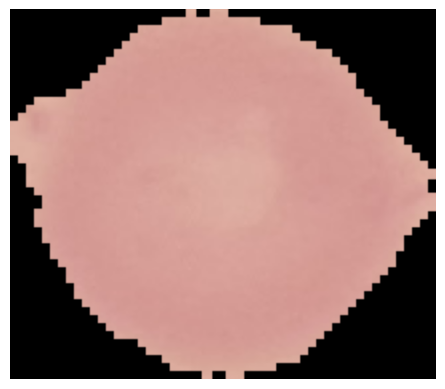

In [7]:
plt.imshow(uninfected_image)
plt.axis("off")
plt.show()

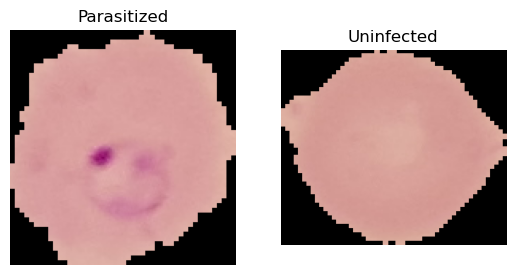

In [8]:
fig, axes = plt.subplots(1, 2)

# Parasitized görsel örneği
parasitized_images = [filename for filename in os.listdir(parasitized_path) if filename.endswith(".png")]
parasitized_image_path = os.path.join(parasitized_path, parasitized_images[0])
parasitized_image = Image.open(parasitized_image_path)

axes[0].imshow(parasitized_image)
axes[0].axis("off")
axes[0].set_title("Parasitized")

# Uninfected görsel örneği
uninfected_images = [filename for filename in os.listdir(uninfected_path) if filename.endswith(".png")]
uninfected_image_path = os.path.join(uninfected_path, uninfected_images[0])
uninfected_image = Image.open(uninfected_image_path)

axes[1].imshow(uninfected_image)
axes[1].axis("off")
axes[1].set_title("Uninfected")

plt.show()

In [9]:
# Modelling

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Veri yolu
data_path = r"C:\Users\merve\Documents\yapay zeka\projects\Image Classification with CNN for Malaria Data\cell_images"

In [12]:
# Veri ön işleme
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [13]:
# Eğitim verileri
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="training")

Found 22048 images belonging to 2 classes.


In [14]:
# Doğrulama verileri
validation_generator = datagen.flow_from_directory(
   data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="validation")

Found 5510 images belonging to 2 classes.


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# Model oluşturma
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

In [17]:
# Model derleme
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
# Model eğitimi
#model.fit(
 #   train_generator, 
  #  steps_per_epoch=train_generator.samples // train_generator.batch_size,
   # epochs=10,
    #validation_data=validation_generator,
    #validation_steps=validation_generator.samples // validation_generator.batch_size)

In [19]:
# Eğitim süreci sonuçlarını al
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
689/689 [==============================] - 301s 432ms/step - loss: 0.3116 - accuracy: 0.8517 - val_loss: 0.1638 - val_accuracy: 0.9426
Epoch 2/10
689/689 [==============================] - 327s 475ms/step - loss: 0.1366 - accuracy: 0.9562 - val_loss: 0.1497 - val_accuracy: 0.9484
Epoch 3/10
689/689 [==============================] - 430s 625ms/step - loss: 0.1212 - accuracy: 0.9597 - val_loss: 0.1512 - val_accuracy: 0.9471
Epoch 4/10
689/689 [==============================] - 368s 534ms/step - loss: 0.1109 - accuracy: 0.9624 - val_loss: 0.1511 - val_accuracy: 0.9482
Epoch 5/10
689/689 [==============================] - 407s 591ms/step - loss: 0.0992 - accuracy: 0.9667 - val_loss: 0.1511 - val_accuracy: 0.9500
Epoch 6/10
689/689 [==============================] - 411s 597ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.1495 - val_accuracy: 0.9491
Epoch 7/10
689/689 [==============================] - 328s 476ms/step - loss: 0.0761 - accuracy: 0.9740 - val_loss: 0.1573 -

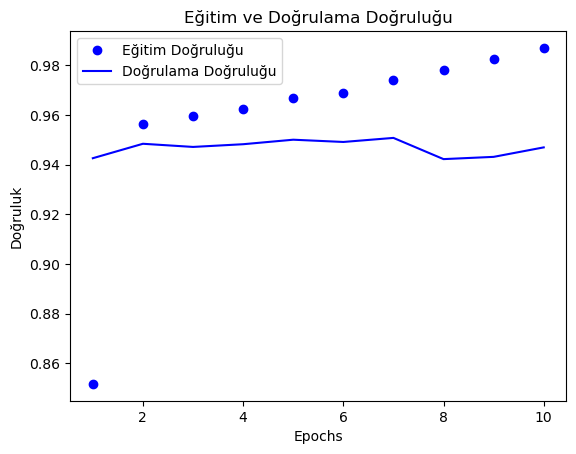

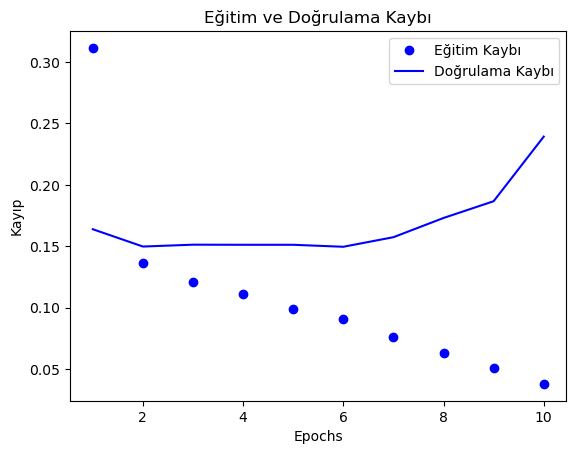

In [24]:
import matplotlib.pyplot as plt

def plot_model_performance(history):
    # Doğruluk değerlerini al
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Kayıp değerlerini al
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Grafikleri çiz
    epochs = range(1, len(accuracy) + 1)

    # Doğruluk değerlerinin grafiği
    plt.plot(epochs, accuracy, 'bo', label='Eğitim Doğruluğu')
    plt.plot(epochs, val_accuracy, 'b', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epochs')
    plt.ylabel('Doğruluk')
    plt.legend()

    plt.figure()

    # Kayıp değerlerinin grafiği
    plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epochs')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.show()

# Model performansını görselleştir
plot_model_performance(history)
